# DWCmod - dropwise condensation modeling
A simple python implementation of thermodynamic models for dropwise condensation.

This Jupyter notebook provides some examples for the plotting functions.
Please refer to the corresponding [GitHub repository](https://github.com/JSablowski/DWCmod) for additional information.

In [2]:
import DWC_plotting as DWC                    # import plotting functions

## Input Parameters
Defining the input parameters for the calculation. The plots below can easily be changed by adjusting the input parameters and rerunning the script. Please refer to the [CoolProp documentation](http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids) for a list of supported fluids.

In [3]:
inputParameters = {"medium":"Water",          # choose the condensing fluid
                  "p_steam":337.8,            # pressure in mbar
                  "deltaT_sub":5,             # surface subcooling temperature in K
                  "Theta":90,                 # contact angle in deg
                  "CAH":10,                   # contact angle hysteresis in deg
                  "k_coat":0.2,               # thermal conductivity of the coating in W/(mK)
                  "delta_coat":0.000001,      # thickness of the coating in m
                  "h_i":15.7,                 # interfacial heat transfer coefficient in MW/m²K, if no value is given, h_i is calculated
                  "c":1,                      # numerical constant, "depends on the shape of the drop and on the steepness of the substrate surface" 
                  "N_s":250}                  # number of Nucleation sites in 10^9 1/m² 

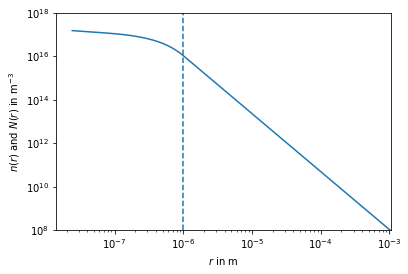

In [4]:
fig = DWC.plot_Nr_r(inputParameters)
fig.savefig("tropfengroessenverteilung.jpg", dpi=400)

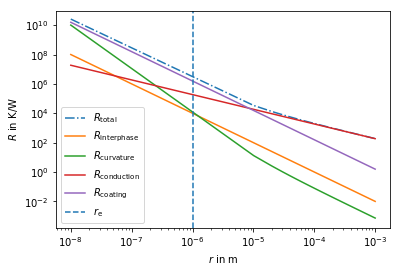

In [5]:
fig = DWC.plot_Rdrop(inputParameters)
fig.savefig("widerstaende_tropfen.jpg", dpi=400)

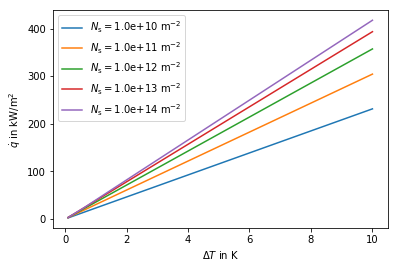

In [6]:
fig = DWC.plot_q_deltaTsub(inputParameters, N_s=[10, 100, 1000, 10000, 100000]) 
fig.savefig("keimstellendichte.jpg", dpi=400)

Variation des kondensierenden Fluids:

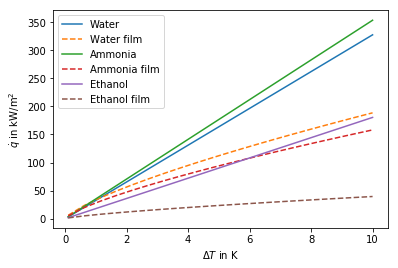

In [7]:
fig = DWC.plot_q_deltaTsub(inputParameters, medium=["Water", "Ammonia", "Ethanol"], filmwise=True)
fig.savefig("fluide.jpg", dpi=400)